In [1]:
import numpy as np
import pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional,LSTM, Dropout
from keras.layers import Embedding
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy,categorical_crossentropy
from keras.callbacks import ModelCheckpoint

In [2]:
train_1_df=pd.read_csv('text_eng_hin.txt',delimiter='\t',header=None)
train_2_df=pd.read_csv('train_eng_hin.txt',delimiter='\t',header=None)
train_3_df = pd.read_csv('validation_eng_hin.txt',delimiter='\t',header=None)

In [3]:
train_3_df.head()

,0,1,2,3,4,5,6
0,2853,238,215,121,97,a bunch of books on book stand,पुस्तक स्टैंड पर पुस्तकों का एक गुच्छा
1,2399123,128,19,16,25,gold religious cross on top of golden ball,स्वर्ण गेंद के शीर्ष पर स्वर्ण धार्मिक क्रॉस
2,2358957,292,155,16,119,Candle on glass candle stand,कांच के मोमबत्ती स्टैंड पर मोमबत्ती
3,2373836,46,0,452,112,a blue wall beside tennis court,टेनिस कोर्ट के बगल में एक नीली दीवार
4,2378828,221,92,54,42,fine thin red hair,सूक्ष्म पतले लाल बाल


In [4]:
def read(df):
#     df=pd.read_csv(path,delimiter='\t',header=None)
    df.rename(columns={0:'image_id',1:'x',2:'y',3:'width',4:'height',5:'english',6:'hindi'},inplace=True)
    df.drop(columns=['x','y','width','height'],inplace=True)
    return df

In [5]:
train_3_df=read(train_3_df)
train_2_df=read(train_2_df)
train_1_df=read(train_1_df)

In [6]:
train_3_df.head()

,image_id,english,hindi
0,2853,a bunch of books on book stand,पुस्तक स्टैंड पर पुस्तकों का एक गुच्छा
1,2399123,gold religious cross on top of golden ball,स्वर्ण गेंद के शीर्ष पर स्वर्ण धार्मिक क्रॉस
2,2358957,Candle on glass candle stand,कांच के मोमबत्ती स्टैंड पर मोमबत्ती
3,2373836,a blue wall beside tennis court,टेनिस कोर्ट के बगल में एक नीली दीवार
4,2378828,fine thin red hair,सूक्ष्म पतले लाल बाल


In [7]:
train_1_df.shape,train_2_df.shape,train_3_df.shape

((1595, 3), (998, 3), (1400, 3))

In [10]:
df = pd.concat([train_1_df,train_2_df,train_3_df])

In [11]:
df.drop(columns='image_id',inplace = True)

In [12]:
df.reset_index(inplace=True)

In [13]:
eng = df['english']
hindi = df['hindi']

In [14]:
from collections import Counter

In [15]:
english_words_counter =Counter([word for sentence in eng for word in sentence.split()])
hindi_words_counter =Counter([word for sentence in hindi for word in sentence.split()])

In [16]:
english_words_counter

Counter({'the': 1205,
         'orange': 50,
         'colored': 15,
         'traffic': 16,
         'cone': 4,
         'A': 291,
         'stop': 17,
         'light': 44,
         'three': 18,
         'zebras': 10,
         'in': 525,
         'wild': 1,
         'cars': 3,
         'parked': 23,
         'along': 6,
         'side': 41,
         'of': 612,
         'road': 32,
         'a': 1559,
         'man': 210,
         'climbing': 1,
         'into': 6,
         'train': 75,
         'This': 26,
         'is': 481,
         'person': 94,
         'Box': 2,
         'small': 37,
         'oranges': 3,
         'box.': 2,
         'Signs': 2,
         'about': 4,
         'TRAMS': 1,
         'on': 1108,
         'post.': 1,
         'white': 352,
         'box': 20,
         'filled': 6,
         'with': 226,
         'doughnuts': 1,
         'wearing': 89,
         'black': 200,
         'hat': 23,
         'bird': 34,
         'girl': 21,
         'standing.': 1,
        

In [17]:
hindi_words_counter

Counter({'नारंगी': 55,
         'रंग': 114,
         'यातायात': 7,
         'शंकु': 3,
         'एक': 1496,
         'स्टॉप': 5,
         'लाइट': 17,
         'जंगल': 3,
         'में': 602,
         'तीन': 29,
         'जेब्रा': 1,
         'सड़क': 89,
         'के': 856,
         'किनारे': 29,
         'खड़ी': 18,
         'कारें': 3,
         'व्यक्ति': 157,
         'रेलगाड़ी': 12,
         'चढ़': 1,
         'रहा': 124,
         'है': 694,
         'यह': 134,
         'बॉक्स': 20,
         'छोटे': 17,
         'संतरे': 7,
         'का': 419,
         'बक्सा': 1,
         'पोस्ट': 4,
         'पर': 1069,
         'गाड़ी': 6,
         'बारे': 3,
         'संकेत।': 2,
         'डोनट्स': 4,
         'से': 161,
         'भरा': 13,
         'सफेद': 381,
         'काले': 84,
         'टोपी': 30,
         'पहनने': 4,
         'वाला': 41,
         'पक्षी': 36,
         'काला': 101,
         'लड़की': 21,
         '.': 34,
         'इमारत': 48,
         'खिड़की': 18,
         'दो': 112,
    

In [18]:
total_eng_words = len([word for sentence in eng for word in sentence.split()])
total_hindi_words = len([word for sentence in hindi for word in sentence.split()])

print('{} Total English words.'.format(total_eng_words))
print('{} Total Hindi words.'.format(total_hindi_words))
print('{} Unique English words.'.format(len(english_words_counter)))
print('{} Unique Hindi words.'.format(len(hindi_words_counter)))

20961 Total English words.
21469 Total Hindi words.
2946 Unique English words.
3003 Unique Hindi words.


In [19]:
def tokenize(data):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(data)
    return tokenizer.texts_to_sequences(data),tokenizer

In [54]:
def pad(sequence_data, length=None):
    if length is None:
        length = max([len(sentence) for sentence in sequence_data])
    return pad_sequences(sequence_data, maxlen = 18, padding = 'post')

In [26]:
def preprocess(x, y):
   
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

In [27]:
preproc_english_sentences, preproc_hindi_sentences, english_tokenizer, hindi_tokenizer = preprocess(eng, hindi)

In [32]:
def bd_model(input_shape, output_sequence_length, english_vocab_size, hindi_vocab_size):
    
    learning_rate = 0.003
    
    # Build the layers
    model = Sequential()
    model.add(Embedding(hindi_vocab_size, 256, input_length=input_shape[1], input_shape=input_shape[1:]))
    model.add(Bidirectional(GRU(256, return_sequences=True)))
    model.add(TimeDistributed(Dense(1024, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(english_vocab_size, activation='softmax'))) 

    # Compile model
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

In [110]:
tmp_x = pad(preproc_hindi_sentences, preproc_hindi_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_hindi_sentences.shape[-2]))

# Train 
model = bd_model(
    tmp_x.shape,
    preproc_english_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(hindi_tokenizer.word_index)+1)

model.summary()

history = model.fit(tmp_x, preproc_english_sentences, batch_size=64, epochs=15, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 18, 256)           762624    
                                                                 
 bidirectional_2 (Bidirecti  (None, 18, 512)           789504    
 onal)                                                           
                                                                 
 time_distributed_4 (TimeDi  (None, 18, 1024)          525312    
 stributed)                                                      
                                                                 
 dropout_2 (Dropout)         (None, 18, 1024)          0         
                                                                 
 time_distributed_5 (TimeDi  (None, 18, 2372)          2431300   
 stributed)                                                      
                                                      

In [111]:
# We also need a function to convert the final prediction by our model into text form.
def logits_to_text(logits, tokenizer):
    
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = ' '

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

In [124]:

for i in range(10,21):   
    print("\nOriginal text:")
    print(hindi[i])
    print("\nCorrect Translation:")
    print(eng[i])
    print("\nPrediction:")
    print(logits_to_text(model.predict(tmp_x[[i]])[0], english_tokenizer))
    print("-"*50)


Original text:
पक्षी काला है

Correct Translation:
the bird is black

Prediction:
1/1 [==============================] - 0s 28ms/step
the bird is black                            
--------------------------------------------------

Original text:
एक लड़की खड़ी है .

Correct Translation:
a girl is standing.

Prediction:
1/1 [==============================] - 0s 24ms/step
a girl is standing                            
--------------------------------------------------

Original text:
इमारत पर खिड़की

Correct Translation:
window on a building

Prediction:
1/1 [==============================] - 0s 23ms/step
window on a building                            
--------------------------------------------------

Original text:
दो लंबी इमारतों के बीच की दूरी में देखा गया एक दक्षिणपश्चिम हवाई जहाज

Correct Translation:
a Southwest airliner seen in the distance between two tall buildings

Prediction:
1/1 [==============================] - 0s 23ms/step
a southwest airliner seen the distance distanc

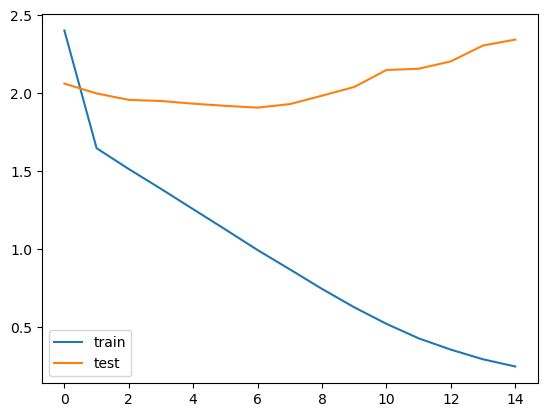

In [115]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

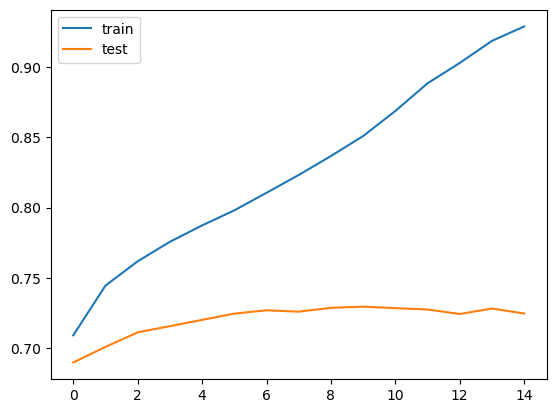

In [116]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()